# Análisis de un DataSet de Ajedrez

Tomamos un dataset en Kaggle que registra cerca de 20000 partidas de ajedrez que se jugaron en la plataforma [lichess](https://lichess.org/http:// "lichess").

In [3]:
#Importamos las librerias necesarias para realizar un análisis exploratorio de los datos (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configuración la presentación de los números flotantes de pandas
pd.options.display.float_format = '{:,.2f}'.format

#Configuramos el estilo de las gráficas de seaborn
sns.set(style='whitegrid', context='notebook')

In [4]:
#Importamos el dataset
data_set = pd.read_csv('Data/chess_games.csv')
data_set.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,"1,504,210,000,000.00","1,504,210,000,000.00",13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,"1,504,130,000,000.00","1,504,130,000,000.00",16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [5]:
#Dimensión del dataset y nombres de las columnas
data_set.shape , data_set.columns

((20058, 16),
 Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
        'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
        'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
       dtype='object'))

## Información general del DataSet (En inglés)

### General Info
This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:
- Game ID;
- Rated (T/F);
- Start Time;
- End Time;
- Number of Turns;
- Game Status;
- Winner;
- Time Increment;
- White Player ID;
- White Player Rating;
- Black Player ID;
- Black Player Rating;
- All Moves in Standard Chess Notation;
- Opening Eco (Standardised Code for any given opening, list [here](http://https://www.365chess.com/eco.php "here"));
- Opening Name;
- Opening Ply (Number of moves in the opening phase)

For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

### Possible Uses
Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.

## Análisis General

In [6]:
#Tipo de variables y cantidad de valores no-nulos
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [7]:
#Descripción básica estadística de las variables numéricas
data_set.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,"20,058.00","20,058.00","20,058.00","20,058.00","20,058.00","20,058.00"
mean,"1,483,616,852,629.09","1,483,617,722,336.14",60.47,"1,596.63","1,588.83",4.82
std,"28,501,509,421.00","28,501,400,588.89",33.57,291.25,291.04,2.80
min,"1,376,771,633,173.00","1,376,771,863,841.00",1.00,784.00,789.00,1.00
25%,"1,477,547,500,000.00","1,477,547,500,000.00",37.00,"1,398.00","1,391.00",3.00
50%,"1,496,010,000,000.00","1,496,010,000,000.00",55.00,"1,567.00","1,562.00",4.00
75%,"1,503,170,000,000.00","1,503,170,000,000.00",79.00,"1,793.00","1,784.00",6.00
max,"1,504,493,143,790.00","1,504,493,827,262.00",349.00,"2,700.00","2,723.00",28.00


### Conclusiones:
Las columnas `created_at` y `last_move_at` quedan pendientes por revisar ya que no ofrecen una información clara.

## Análisis Unidimensional

### Columna: id

In [8]:
#Una descripción de los valores que se encuentran en la columna id
data_set.id.describe()

count        20058
unique       19113
top       XRuQPSzH
freq             5
Name: id, dtype: object

In [9]:
#Se presentan valores repetidos, observamos en particular el id con más frecuencia
data_set[data_set['id'] == 'XRuQPSzH']

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
120,XRuQPSzH,True,"1,503,580,000,000.00","1,503,580,000,000.00",50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
950,XRuQPSzH,True,"1,503,580,000,000.00","1,503,580,000,000.00",50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
12412,XRuQPSzH,True,"1,503,583,909,935.00","1,503,584,352,561.00",50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
13729,XRuQPSzH,True,"1,503,583,909,935.00","1,503,584,352,561.00",50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
14403,XRuQPSzH,True,"1,503,583,909,935.00","1,503,584,352,561.00",50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6


In [10]:
#Eliminamos los registros duplicados
data_set = data_set.drop_duplicates()
data_set.shape

(19629, 16)

In [11]:
#Volvemos a realizar una descripción de la columna 
data_set.id.describe()

count        19629
unique       19113
top       WbTSc5pg
freq             2
Name: id, dtype: object

In [12]:
#Se siguen observando registros duplicados en la columna id
#Observamos en particular el id con más frecuencia
data_set[data_set['id'] == 'WbTSc5pg']

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
6890,WbTSc5pg,True,"1,464,840,000,000.00","1,464,840,000,000.00",100,mate,black,14+0,anakgreget,1720,konstantindn,1748,e4 d5 exd5 Qxd5 Nc3 Qd8 Nf3 Bg4 Be2 Bxf3 Bxf3 ...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4
18636,WbTSc5pg,True,"1,464,839,554,230.00","1,464,840,645,871.00",100,mate,black,14+0,anakgreget,1720,konstantindn,1748,e4 d5 exd5 Qxd5 Nc3 Qd8 Nf3 Bg4 Be2 Bxf3 Bxf3 ...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [13]:
#Se presentan valores distintos en las columnas created_at y last_move_at
#Eliminamos estas columnas y obsevamos si se siguen presentando registros duplicados
data_set.drop(['created_at','last_move_at'], axis=1).drop_duplicates()['id'].describe()

count        19113
unique       19113
top       TZJHLljE
freq             1
Name: id, dtype: object

#### Conclusiones:
Si se quiere trabajar con registros únicos a nivel general, es necesario prescindir de las columnas `created_at` y `last_move_at`, ya que se cuentan registros de la misma partida con diferentes valores en estas columnas.

In [14]:
#Realizamos una copia del dataset prescindiendo de las columnas created_at y last_move_at
data_set_copy = data_set.copy()
data_set_copy = data_set_copy.drop(['created_at','last_move_at'], axis=1).drop_duplicates()

### Columna: rated

In [15]:
#Descripción de los valores en la columna rated
data_set_copy.rated.describe()

count     19113
unique        2
top        True
freq      15467
Name: rated, dtype: object

In [16]:
#Cantidad de registros por valor
values_rated = pd.DataFrame(data_set_copy.rated.value_counts()).rename(columns={"rated":"Total"})
values_rated = values_rated.rename_axis('rated')
values_rated['%'] = (values_rated.Total / values_rated.Total.sum()) * 100
values_rated

,Total,%
rated,,
True,15467,80.92
False,3646,19.08


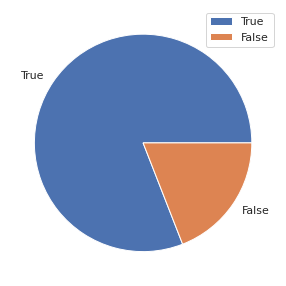

In [17]:
plt.figure(figsize=(5,5))
plt.pie(values_rated.Total, labels=['True', 'False'])
plt.legend()
plt.show()

#### Conclusiones:
Cerca del 80% de las partidas son jugadas de manera que influye en el puntaje(rated) del jugador.

### Columna: created_at

In [18]:
#Breve descripción estadística de los datos
data_set.created_at.describe()

count              19,629.00
mean    1,483,720,725,232.59
std        28,093,644,152.72
min     1,376,771,633,173.00
25%     1,477,530,000,000.00
50%     1,495,830,000,000.00
75%     1,503,107,489,689.00
max     1,504,493,143,790.00
Name: created_at, dtype: float64

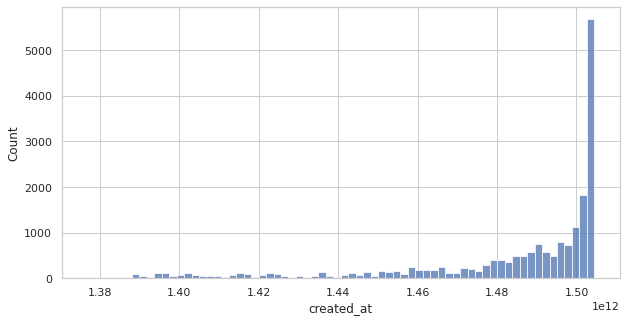

In [19]:
#Observamos la distribución de los valores
plt.figure(figsize=(10,5))
sns.histplot(data=data_set, x='created_at')
plt.show()

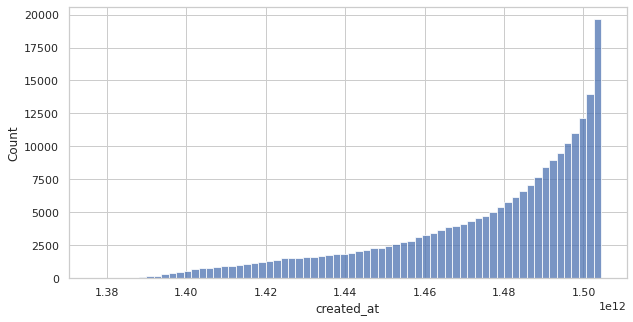

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_set, x='created_at', cumulative=True)
plt.show()

### Columna: last_move_at

In [21]:
#Breve descripción estadística de los datos
data_set.last_move_at.describe()

count              19,629.00
mean    1,483,721,594,909.30
std        28,093,532,529.26
min     1,376,771,863,841.00
25%     1,477,530,000,000.00
50%     1,495,830,000,000.00
75%     1,503,110,000,000.00
max     1,504,493,827,262.00
Name: last_move_at, dtype: float64

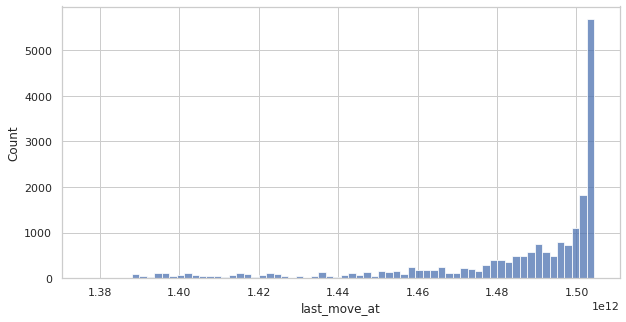

In [22]:
#Observamos la distribución de los valores
plt.figure(figsize=(10,5))
sns.histplot(data=data_set, x='last_move_at')
plt.show()

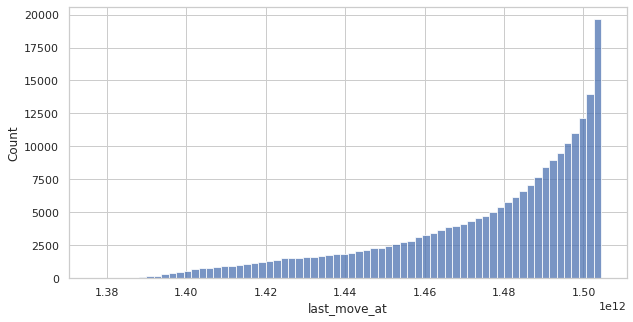

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_set, x='last_move_at', cumulative=True)
plt.show()

### Columna: turns

In [24]:
#Una descripción estadística de los datos
data_set_copy.turns.describe()

count   19,113.00
mean        60.51
std         33.49
min          1.00
25%         37.00
50%         55.00
75%         79.00
max        349.00
Name: turns, dtype: float64

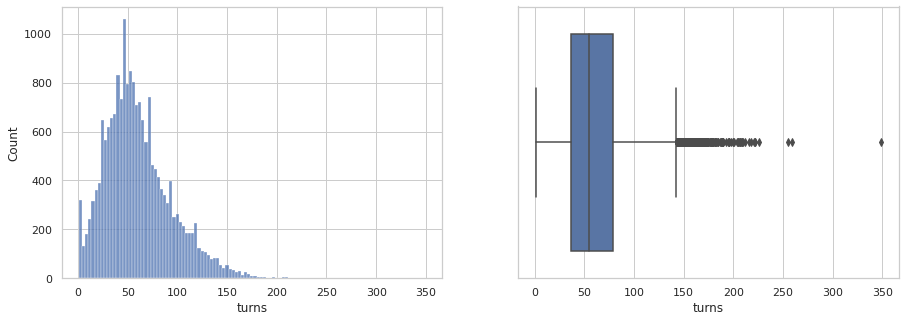

In [25]:
#Gráficos que describen la distribución de los datos
fig , ax = plt.subplots(1,2, figsize=(15,5))

g1 = sns.histplot(data=data_set_copy, x='turns', ax=ax[0])

g2 = sns.boxplot(data=data_set_copy, x='turns', ax=ax[1])

plt.show()

In [26]:
#Creamos un dataset con los datos que se encuentran desfasados
turns_IQR = (data_set_copy.turns.quantile(0.75) - data_set_copy.turns.quantile(0.25))
outlayer_turns = data_set_copy[data_set_copy.turns > data_set_copy.turns.quantile(0.75) + 1.5*turns_IQR]
#Breve descripción del dataset recien creado
outlayer_turns.describe()

,turns,white_rating,black_rating,opening_ply
count,412.00,412.00,412.00,412.00
mean,161.60,"1,696.37","1,702.18",5.07
std,20.18,281.41,267.29,2.87
min,143.00,795.00,891.00,1.00
25%,149.00,"1,500.75","1,500.00",3.00
50%,156.00,"1,672.50","1,698.50",4.00
75%,169.00,"1,859.50","1,876.25",7.00
max,349.00,"2,622.00","2,474.00",19.00


#### Conclusiones:

La distrubución de los datos en la columna `turns` tiene una pequeña inclinación hacia la derecha. Se crea un dataset con los outlayers para posteriores análisis.

### Columna: victory status

In [27]:
data_set_copy.victory_status.describe()

count      19113
unique         4
top       resign
freq       10695
Name: victory_status, dtype: object

In [28]:
#Cantidad de registros por cada tipo de victoria
values_victory_status = pd.DataFrame(data_set_copy.victory_status.value_counts()).rename(columns={"victory_status":"Total"})
values_victory_status = values_victory_status.rename_axis('victory_status')
values_victory_status['%'] = (values_victory_status.Total / values_victory_status.Total.sum()) * 100
values_victory_status

,Total,%
victory_status,,
resign,10695,55.96
mate,5974,31.26
outoftime,1598,8.36
draw,846,4.43


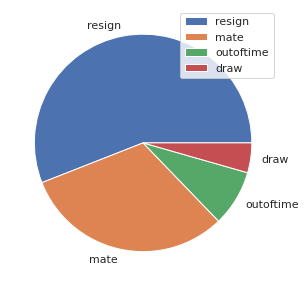

In [29]:
plt.figure(figsize=(5,5))
plt.pie(values_victory_status.Total, labels=['resign', 'mate', 'outoftime', 'draw'])
plt.legend()
plt.show()

#### Conclusiones:

Más de la mitad de las partidas son abandonadas, además, cerca del 30% de las victorias son por **mate**.